<a href="https://colab.research.google.com/github/sehan25/ESAA-2022-1/blob/main/Assignment/0603_Python_Machine_Learning_p377-p407.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Chapter6. 차원 축소

## **01. 차원 축소(Dimension Reduction) 개요**
---

-  차원 축소: 매우 많은 피처로 구성된 다차원 데이터 세트의 차원을 축소해 새로운 차원의 데이터 세트를 생성하는 것

- 일반적으로 차원이 증가할수록 데이터 포인트 간의 거리가 기하급수적으로 멀어지 게 되고, 희소(sparse)한 구조를 가지게 된다.
- 수백 개 이상의 피처로 구성된 데이터 세트의 경우 상 대적으로 적은 차원에서 학습된 모델보다 예측 신뢰도가 떨어진다. 또한 피처가 많을 경우 개별 피처 간에 상관관계가 높을 가능성이 크다. 선형 회귀와 같은 선형 모델에서는 입력 변수 간의 상관관계가 높을 경우 이로 인한 다중 공선성 문제로 모델의 예측 성능이 저하된다.

- 매우 많은 다차원의 피처를 차원 축소해 피처 수를 줄이면 더 직관적으로 데이터를 해석할 수 있다.
- 차원 축소를 할 경우 학습 데이터의 크기가 줄어들어서 학습에 필요한 처리 능력도 줄일 수 있다.
- 일반적으로 차원 축소는 피처 선택(feature selection)과 피처 추출(feature extraction)로 나눌 수 있다.
    - 피처(특성) 선택: 말 그대로 특정 피처에 종속성이 강한 불필요한 피처는 아예 제거하고, 데이터의 특징을 잘 나타내는 주요 피처만 선택하는 것
    - 피처(특성) 추출: 기존 피처를 저 차원의 중요 피처로 압축해서 추출하는 것.
        - 이렇게 새롭게 추출된 중요 특성은 기존의 피처가 압축된 것이므로 기존의 피처와는 완전히 다른 값이 됨
        - 기존 피처를 단순 압축이 아닌, 피처를 함축적으로 더 잘 설명할 수 있는 또 다른 공간으로 매핑해 추출하는 것

- 차원 축소는 단순히 데이터의 압축을 의미하는 것이 아니다. 더 중요한 의미는 차원 축소를 통해 좀 더 데이터를 잘 설명할 수 있는 잠재적인 요소를 추출하는 데에 있다.
    - PCA, SVD, NMF는 이처럼 잠재적인 요소를 찾는 대표적인 차원 축소 알고리즘

- 차원 축소 알고리즘은 매우 많은 픽셀로 이뤄진 이미지 데이터에서 잠재된 특성을 피처로 도출해 함축적 형태의 이미지 변환과 압축을 수행할 수 있다.
    - 변환된 이미지는 원본 이미지보다 훨씬 적은 차원이기 때문에 이미지 분류 등의 분류 수행 시에 과적합(overfitting) 영향력이 작아져서 오히 려 원본 데이터로 예측하는 것보다 예측 성능을 더 끌어 올릴 수 있음
- 차원 축소 알고리즘이 자주 사용되는 또 다른 영역은 텍스트 문서의 숨겨진 의미를 추출하는 것이다.
    - 문서 내 단어들의 구성에서 숨겨져 있는 시맨틱(Semantic) 의미나 토픽(Topic)을 잠재 요소로 간주하고 이를 찾아낼 수 있음. SVD와 NMF는 이러한 시맨틱 토픽(Semantic Topic) 모델링을 위한 기반 알고리즘으로 사용됨


## **02. PCA(Principal Component Analysis)**
---
: 여러 변수 간에 존재하는 상관관계를 이용해 이를 대표하는 주성분(Principal Component)을 추출해 차원을 축소하는 기법

- PCA로 차원을 축소할 때는 기존 데이터의 정보 유실이 최소화되는 것이 당연하다.
- 이를 위해서 PCA는 가장 높은 분산을 가지는 데이터의 축을 찾아 이 축으로 차원을 축소하는데, 이것이 PCA의 주성분이 된다.
    - 제일 먼저 가장 큰 데이터 변동성(Variance)을 기반으로 첫 번째 벡터 축을 생성함
    - 두 번째 축은 이 벡터 축은 직각이 되는 벡터(직교 벡터)를 축으로 함
    - 세 번째 축은 다시 두 번째 축과 직각이 되는 벡터를 설정하는 방식으로 축을 생성함

- PCA를 선형대수 관점에서 해석해 보면, 입력 데이터의 공분산 행렬(Covariance Matrix)을 고유값 분해하고, 이렇게 구한 고유벡터에 입력 데이터를 선형 변환하는 것이다.
    - 고유벡터가 PCA의 주성분 벡터로서 입력 데이터의 분산이 큰 방향을 나타냄. 고윳값(eigenvalue)은 바로 이 고유벡터의 크기를 나타내며, 동시에 입력 데이터의 분산을 나타냄
    - 강조하고자 하는 것은 입력 데이터의 공분산 행렬이 고유벡터와 고유값으로 분해될 수 있으며, 이렇게 분해된 고유벡터를 이용해 입력 데이터를 선형 변환하는 방식이 PCA라는 것
        1. 입력 데이터 세트의 공분산 행렬을 생성
        2. 공분산 행렬의 고유벡터와 고유값을 계산
        3. 고유값이 가장 큰 순으로 K개(PCA 변환 차수만큼) 고유벡터를 추출
        4. 고유값이 가장 큰 순으로 추출된 고유벡터를 이용해 새롭게 입력 데이터를 변환

붓꽃 데이터 세트 4개의 속성을 2개의 PCA 차원으로 압축해 원래 데이터 세트와 압축된 데이터 세트가 어떻게 달라졌는지 확인
- 사이킷런의 붓꽃 데이터 세트를 `load_iris()` API를 이용해 로딩한 뒤 이 데이터를 더 편하게 시각하기 위해 DataFrame으로 변환

In [1]:
from sklearn.datasets import load_iris
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

iris = load_iris()

# 넘파이 데이터 세트를 판다스 DataFrame으로 변환
columns = ['sepal_length','sepal_width','petal_length','petal_width']
irisDF = pd.DataFrame(iris.data, columns=columns)
irisDF['target']=iris.target
irisDF.head(3)

,sepal_length,sepal_width,petal_length,petal_width,target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0


- 각 품종에 따라 원본 붓꽃 데이터 세트가 어떻게 분포돼 있는지 2차원으로 시각화

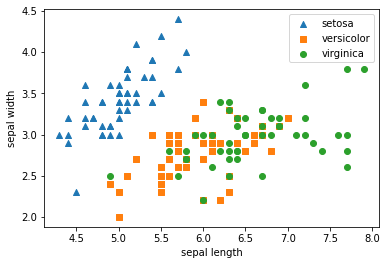

In [2]:
## 각 품종에 따라 원본 붓꽃 데이터 세트가 어떻게 분포돼 있는지 2차원으로 시각화

#setosa는 세모, versicolor는 네모, virginica는 동그라미로 표현
markers=['^', 's', 'o']

#setosa의 target 값은 0, versicolor는 1, virginica는 2. 각 target 별로 다른 모양으로 산점도 표시 
for i, marker in enumerate(markers):
    x_axis_data = irisDF[irisDF['target']==i]['sepal_length']
    y_axis_data = irisDF[irisDF['target']==i]['sepal_width']
    plt.scatter(x_axis_data, y_axis_data, marker=marker,label=iris.target_names[i])

plt.legend()
plt.xlabel('sepal length')
plt.ylabel('sepal width')
plt.show()

- PCA를 적용하기 전에 개별 속성을 함께 스케일링
    - PCA는 여러 속성의 값을 연산해야 하므로 속성의 스케일에 영향을 받음
    - 여러 속성을 PCA로 압축하기 전에 각 속성값을 동일한 스케일로 변환하는 것이 필요

In [3]:
## 사이킷런의 StandardScaler를 이용해 평균이 0, 분산이 1인 표준 정규 분포로 속성값들을 스케일링 변환

from sklearn.preprocessing import StandardScaler

# Target 값을 제외한 모든 속성 값을 StandardScaler를 이용해 표준 정규 분포를 가지는 값들로 변환
iris_scaled = StandardScaler().fit_transform(irisDF.iloc[:, :-1])

- 스케일링이 적용된 데이터 세트에 PCA를 적용해 4차원(4개 속성)의 붓꽃 데이터를 2차원(2개의 PCA 속성) PCA 데이터로 변환
    - 사이킷런은 PCA 변환을 위해 PCA 클래스 제공함
        - 생성 파라미터로 `n_components`를 입력받는데, 이는 PCA로 변환할 차원의 수를 의미
        - `fit`(입력 데이터 세트)과 `transform`(입력 데이터 세트)을 호출해 PCA로 변환 수행

In [4]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)

#fit()과 transform() 을 호출하여 PCA 변환 데이터 반환
pca.fit(iris_scaled)
iris_pca = pca.transform(iris_scaled)
print(iris_pca.shape)

(150, 2)


In [5]:
## DataFrame으로 변환한 뒤 데이터값 확인

# PCA 변환된 데이터의 컬럼명을 각각 pca_component_1, pca_component_2로 명명
pca_columns=['pca_component_1','pca_component_2']
irisDF_pca = pd.DataFrame(iris_pca,columns=pca_columns)
irisDF_pca['target']=iris.target
irisDF_pca.head(3)

,pca_component_1,pca_component_2,target
0,-2.264703,0.480027,0
1,-2.080961,-0.674134,0
2,-2.364229,-0.341908,0


- 2개의 속성으로 PCA 변환된 데이터 세트를 2차원상에서 시각화

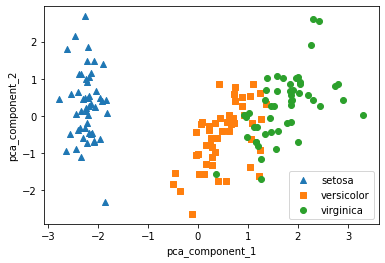

In [6]:
#setosa를 세모, versicolor를 네모, virginica를 동그라미로 표시
markers=['^', 's', 'o']

#pca_component_1을 x축, pc_component_2를 y축으로 scatter plot 수행 
for i, marker in enumerate(markers):
    x_axis_data = irisDF_pca[irisDF_pca['target']==i]['pca_component_1']
    y_axis_data = irisDF_pca[irisDF_pca['target']==i]['pca_component_2']
    plt.scatter(x_axis_data, y_axis_data, marker=marker,label=iris.target_names[i])

plt.legend()
plt.xlabel('pca_component_1')
plt.ylabel('pca_component_2')
plt.show()

    Versicolor와 Virginica는 pca_component_1 축을 기반으로 서로 겹치는 부분이 일부 존재하지만, 비교적 잘 구분됨

- PCA Component별로 원본 데이터의 변동성을 얼마나 반영하고 있는지 알아보기
    - PCA 변환을 수행한 PCA 객체의 `explained_variance_ratio_` 속성은 전체 변동성에서 개별 PCA 컴포넌트별로 차지하는 변동성 비율 제공

In [7]:
print(pca.explained_variance_ratio_)

[0.72962445 0.22850762]


- 원본 붓꽃 데이터 세트와 PCA로 변환된 데이터 세트에 각각 분류를 적용한 후 결과 비교
    - Estimator는 RandomForestClassifier를 이용하고 `cross_val_score()`로 3개의 교차 검증 세트로 정확도 결과 비교

In [8]:
## 원본 붓꽃 데이터에 랜덤 포레스트(Random Forest)를 적용

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
import numpy as np

rcf = RandomForestClassifier(random_state=156)
scores = cross_val_score(rcf, iris.data, iris.target,scoring='accuracy',cv=3)
print('원본 데이터 교차 검증 개별 정확도:', scores)
print('원본 데이터 평균 정확도:', np.mean(scores))

원본 데이터 교차 검증 개별 정확도: [0.98 0.94 0.96]
원본 데이터 평균 정확도: 0.96


In [9]:
## 기존 4차원 데이터를 2차원으로 PCA 변환한 데이터 세트에 랜덤 프로세트 적용

pca_X = irisDF_pca[['pca_component_1', 'pca_component_2']]
scores_pca = cross_val_score(rcf, pca_X, iris.target, scoring='accuracy', cv=3)
print('PCA 변환 데이터 교차 검증 개별 정확도:', scores_pca)
print('PCA 변환 데이터 평균 정확도:', np.mean(scores_pca))

PCA 변환 데이터 교차 검증 개별 정확도: [0.88 0.88 0.88]
PCA 변환 데이터 평균 정확도: 0.88


    원본 데이터 세트 대비 예측 정확도는 PCA 변환 차원 개수에 따라 예측 성능이 떨어질 수밖에 없음. 10%의 정확도 하락은 비교적 큰 성능 수치의 감소지만, 4개의 속성이 2개로, 속성 개수가 50% 감소한 것을 고려한다면 PCA 변환 후에도 원본 데이터의 특성을 상당 부분 유지하고 있음을 알 수 있음

*좀 더 많은 피처를 가진 데이터 세트를 적은 PCA 컴포넌트 기반으로 변환한 뒤, 예측 영향도가 어떻게 되는지 변환된 PCA 데이터 세트에 기반해서 비교*
- 사용할 데이터 세트는 UCI Machine Learning Repository에 있는 신용카드 고객 데이터 세트(Credit Card Clients Data Set)이다.

In [10]:
!pip install xlrd
!pip install --upgrade xlrd
!pip install --upgrade pandas
!pip install openpyxl
!pip install xlrd==1.2.0

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Using cached xlrd-2.0.1-py2.py3-none-any.whl (96 kB)
  Attempting uninstall: xlrd
    Found existing installation: xlrd 1.2.0
    Uninstalling xlrd-1.2.0:
      Successfully uninstalled xlrd-1.2.0
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Using cached xlrd-1.2.0-py2.py3-none-any.whl (103 kB)
  Attempting uninstall: xlrd
    Found existing installation: xlrd 2.0.1
    Uninstalling xlrd-2.0.1:
      Successfully uninstalled xlrd-2.0.1


In [11]:
import pandas as pd
from google.colab import drive
drive.mount('/content/drive')

# header로 의미 없는 첫 행 제거, iloc로 기존 id 제거
df = pd.read_excel('/content/drive/MyDrive/ESAA/data/credit_card.xls', header=1, sheet_name='Data').iloc[0:,1:]
print(df.shape)
df.head(3)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
(30000, 24)


,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,20000,2,2,1,24,2,2,-1,-1,-2,...,0,0,0,0,689,0,0,0,0,1
1,120000,2,2,2,26,-1,2,0,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,90000,2,2,2,34,0,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0


In [12]:
df.rename(columns={'PAY_0':'PAY_1','default payment next month':'default'}, inplace=True)
y_target = df['default']
X_features = df.drop('default', axis=1)

- DataFrame의 `corr()`를 이용해 각 속성 간의 상관도를 구한 뒤 이를 시본(Seaborn)의 heatmap으로 시각화

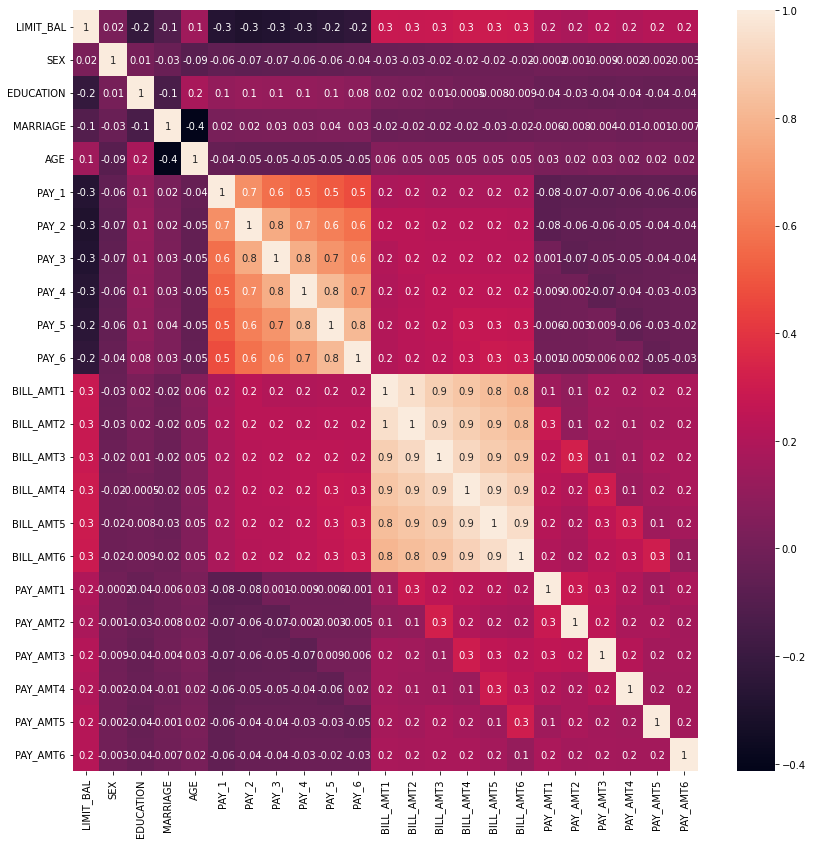

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

corr = X_features.corr()
plt.figure(figsize=(14,14))
sns.heatmap(corr, annot=True, fmt='.1g')

    BILL_AMT1 ~ BILL_AMT6 6개 속성끼리의 상관도가 대부분 0.9 이상으로 매우 높음을 알 수 있음. 이렇게 높은 상관도를 가진 속성들은 소수의 PCA만으로도 자엽스럽게 이 속성들의 변동성을 수용 가능함

- 6개 속성을 2개의 컴포넌트로 PCA 변환한 뒤 개별 컴포넌트의 변동성을 `explained_variance_ratio_` 속성으로 알아보기

In [14]:
## 6개 속성을 2개의 컴포넌트로 PCA 변환한 뒤 개별 컴포넌트의 변동성을 explained_variance_ratio_ 속성으로 알아보기

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

#BILL_AMT1 ~ BILL_AMT6까지 6개의 속성명 생성
cols_bill = ['BILL_AMT'+str(i) for i in range(1,7)]
print('대상 속성명:',cols_bill)

# 2개의 PCA 속성을 가진 PCA 객체 생성하고, explained_variance_ratio_ 계산을 위해 fit() 호출
scaler = StandardScaler()
df_cols_scaled = scaler.fit_transform(X_features[cols_bill])
pca = PCA(n_components=2)
pca.fit(df_cols_scaled) 
print('PCA Component별 변동성:', pca.explained_variance_ratio_)

대상 속성명: ['BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6']
PCA Component별 변동성: [0.90555253 0.0509867 ]


- 원본 데이터 세트와 6개의 컴포넌트로 PCA 변환한 데이터 세트의 분류 예측 결과를 상호 비교

In [15]:
## 원본 데이터 세트에 랜덤 포레스트를 이용해 타깃 값이 디폴트 값을 3개의 교차 검증 세트로 분류 예측

import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

rcf = RandomForestClassifier(n_estimators=300, random_state=156)
scores = cross_val_score(rcf, X_features, y_target, scoring='accuracy', cv=3)

print('CV=3 인 경우의 개별 Fold 세트별 정확도:',scores)
print('평균 정확도:{0:.4f}'.format(np.mean(scores)))

CV=3 인 경우의 개별 Fold 세트별 정확도: [0.8083 0.8196 0.8232]
평균 정확도:0.8170


In [16]:
## 6개의 컴포넌트로 PCA 변환한 데이터 세트에 대해서 동일하게 분류 예측 적용

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# 원본 데이터셋에 먼저 StandardScaler 적용
scaler = StandardScaler()
df_scaled = scaler.fit_transform(X_features)

# 6개의 Component를 가진 PCA 변환을 수행하고 cross_val_score()로 분류 예측 수행
pca = PCA(n_components=6)
df_pca = pca.fit_transform(df_scaled)
scores_pca = cross_val_score(rcf, df_pca, y_target, scoring='accuracy', cv=3)

print('CV=3 인 경우의 PCA 변환된 개별 Fold 세트별 정확도:',scores_pca)
print('PCA 변환 데이터 세트 평균 정확도:{0:.4f}'.format(np.mean(scores_pca)))

CV=3 인 경우의 PCA 변환된 개별 Fold 세트별 정확도: [0.7896 0.7964 0.8011]
PCA 변환 데이터 세트 평균 정확도:0.7957


    전체 23개 속성의 약 1/4 수준인 6개의 PCA 컴포넌트만으로도 원본 데이터를 기반으로 한 분류 예측 결과보다 약 1 ~ 2% 정도의 예측 성능 저하만 발생함

## **03. LDA(Linear Discriminant Analysis)**
----
: 선형 팔별 분석법, PCA와 유사하게 입력 데이터 세트를 저차원 공간에 투영해 차원을 축소하는 기법

- 중요한 차이는 LDA는 지도학습의 분류(Classification)에서 사용하기 쉽도록 개별 클래스를 분별할 수 있는 기준을 최대한 유지하면서 차원을 축소한다.
    - PCA는 입력 데이터의 변동성의 가장 큰 축을 찾았지만, LDA는 입력 데이터의 결정 값 클래스를 최대한 분리할 수 있는 축을 찾음
- LDA는 특정 공간상에서 클래스 분리를 최대화하는 축을 찾기 위해 클래스 간 분산(between-class-scatter)과 클래스 내부 분산(within-class scatter)의 비율을 최대화하는 방식으로 차원을 축소한다.
    - 즉, 클래스 간 분산은 최대한 크게 가져가고, 클래스 내부의 분산은 최대한 작게 가져가는 방식임
- 일반적으로 LDA를 구하는 스텝은 PCA와 유사하나 가장 큰 차이점은 공분산 행렬이 아니라 위에 설명한 클래스 간 분산과 클래스 내부 분산 행렬을 생성한 뒤, 이 행렬에 기반해 고유벡터를 구하고 입력 데이터를 투영한다는 점이다. 
    1. 클래스 내부와 클래스 간 분산 행렬을 구한다. 이 두 개의 행렬은 입력 데이터의 결정 값 클래스별로 개별 피처의 평균 벡터(mean vector)를 기반으로 구한다.
    2. 클래스 내부 분산 행렬을 SW, 클래스 간 분산 행렬을 SB라고 하면 다음 식으로 두 행렬을 고유벡터로 분해할 수 있다.
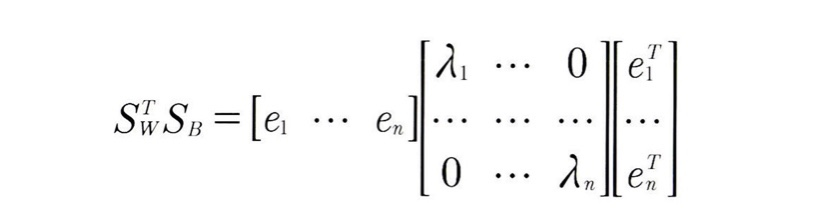
    3. 고유값이 가장 큰 순으로 K개(LDA 변환 차수만큼) 추출한다.
    4. 고유값이 가장 큰 순으로 추출된 고유벡터를 이용해 새롭게 입력 데이터를 변환한다.

*붓꽃 데이터 세트를 사이킷런의 LDA를 이용해 변환하고, 그 결과를 품종별로 시각화*

- 붓꽃 데이터 세트를 로드하고 표준 정규 분포로 스케일링
    - 사이킷런은 LDA를 LinearDiscriminantAnalysis 클래스로 제공

In [17]:
## 붓꽃 데이터 세트를 로드하고 표준 정규 분포로 스케일링

from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import load_iris

iris = load_iris()
iris_scaled = StandardScaler().fit_transform(iris.data)

- 2개의 컴포넌트로 붓꽃 데이터를 LDA 변환
    - PCA와 다르게 한 가지 유의해야할 점은 LDA는 실제로는 비지도학습이 아닌 지도학습이라는 것임. 즉, 클래스의 결정값이 변환 시에 필요함
    - lda 객체의 `fit()` 메서드를 호출할 때 결정값이 입력됐음에 유의

In [18]:
## 2개의 컴포넌트로 붓꽃 데이터를 LDA 변환

lda = LinearDiscriminantAnalysis(n_components=2)
lda.fit(iris_scaled, iris.target)
iris_lda = lda.transform(iris_scaled)
print(iris_lda.shape)

(150, 2)


- LDA 변환된 입력 데이터 값을 2차원 평면에 품종별로 표현

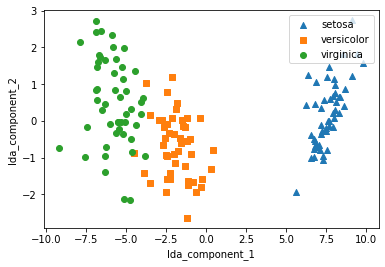

In [19]:
## LDA 변환된 입력 데이터 값을 2차원 평면에 품종별로 표현

import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

lda_columns=['lda_component_1','lda_component_2']
irisDF_lda = pd.DataFrame(iris_lda,columns=lda_columns)
irisDF_lda['target']=iris.target

# setosa는 세모, versicolor는 네모, virginica는 동그라미로 표현
markers=['^', 's', 'o']

# setosa의 target 값은 0, versicolor는 1, virginica는 2. 각 target별로 다른 모양으로 산점도로 표시
for i, marker in enumerate(markers):
    x_axis_data = irisDF_lda[irisDF_lda['target']==i]['lda_component_1']
    y_axis_data = irisDF_lda[irisDF_lda['target']==i]['lda_component_2']

    plt.scatter(x_axis_data, y_axis_data, marker=marker,label=iris.target_names[i])

plt.legend(loc='upper right')
plt.xlabel('lda_component_1')
plt.ylabel('lda_component_2')
plt.show()

## **04. SVD(Singular Value Decomposition)**
---

- SVD 역시 PCA와 유사한 행렬 분해 기법을 이용한다. PCA의 경우 정방행렬만 분해할 수 있지만, SVD는 정방행렬 뿐만 아니라 행과 열의 크기가 다른 행렬에도 적용할 수 있다.
- 일반적으로 SVD는 m x n 행렬 A를 다음과 같이 분해하는 것을 말한다.
$$ A = UDV^T$$
    - SVD는 특이값 분해로 불리며, 행렬 U와 V에 속한 벡터는 특이벡터(singular vector)이며, 모든 특이 벡터는 서로 직교하는 성질을 가짐
    - 가운데는 대각행렬이며, 행렬의 대각에 위치한 값만 0이 아니고 나머지 위치의 값은 모두 0이며 0이 아닌 값이 바로 행렬 A의 특이값
    - A의 차원이 m * n일 때 U의 차원이 m * n, 시그마의 차원이 m * n, t(V)의 차원이 n * n으로 분해함

- 하지만 일반적으로 아래와 같이 시그마의 비대각인 부분과 대각 원소 중 singular value가 0인 부분도 모두 제거하고 제거된 시그마에 대응되는 U와 V 원소도 함께 제거해 차원을 줄인 형태로 SVD를 적용한다.
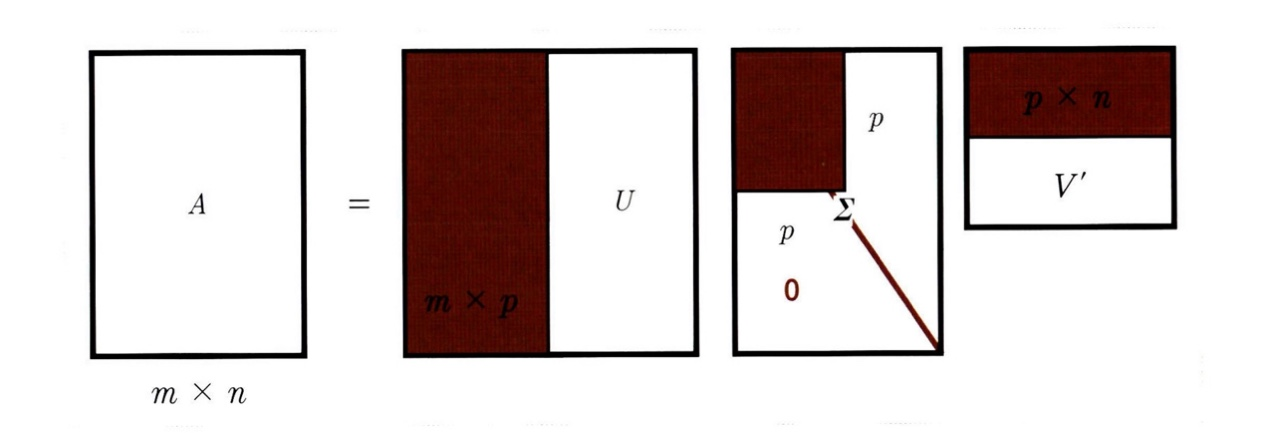

- Truncated SVD는 시그마의 대각 원소 중 상위 몇 개만 추출해, 여기에 대응하는 U와 V의 원소도 함께 제거해 더욱 차원을 줄인 형태로 분해하는 것이다.
    - 일반적으로 SVD는 보통 넘파이나 사이파이 라이브러리를 이용해 수행

- 넘파이의 SVD 모듈인 numpy.linalg.svd를 로딩하고 랜덤한 4 * 4 넘파이 행렬을 생성
    - 랜덤 행렬을 생성하는 이유는 행렬의 개별 로우끼리의 의존성을 없애기 위함

In [20]:
# numpy의 svd 모듈 import
import numpy as np
from numpy.linalg import svd

# 4X4 Random 행렬 a 생성 
np.random.seed(121)
a = np.random.randn(4,4)
print(np.round(a, 3))

[[-0.212 -0.285 -0.574 -0.44 ]
 [-0.33   1.184  1.615  0.367]
 [-0.014  0.63   1.71  -1.327]
 [ 0.402 -0.191  1.404 -1.969]]


- 생성된 a 행렬에 SVD를 적용해 U, Sigma, Vt를 도출
    - SVD 분해는 numpy.linalg.svd에 파라미터로 원본 행렬을 입력하면 U 행렬, Sigma 행렬, V 전치 행렬을 반환

In [21]:
## 생성된 a 행렬에 SVD를 적용해 U, Sigma, Vt를 도출

U, Sigma, Vt = svd(a)
print(U.shape, Sigma.shape, Vt.shape)
print('U matrix:\n',np.round(U, 3))
print('Sigma Value:\n',np.round(Sigma, 3))
print('V transpose matrix:\n',np.round(Vt, 3))

(4, 4) (4,) (4, 4)
U matrix:
 [[-0.079 -0.318  0.867  0.376]
 [ 0.383  0.787  0.12   0.469]
 [ 0.656  0.022  0.357 -0.664]
 [ 0.645 -0.529 -0.328  0.444]]
Sigma Value:
 [3.423 2.023 0.463 0.079]
V transpose matrix:
 [[ 0.041  0.224  0.786 -0.574]
 [-0.2    0.562  0.37   0.712]
 [-0.778  0.395 -0.333 -0.357]
 [-0.593 -0.692  0.366  0.189]]


- 분해된 이 U, Sigma, Vt를 이용해 다시 원본 행렬로 정확히 복원되는지 확인
    - 원본 행렬로의 복원은 U, Sigma, Vt를 내적하면 되는데 한 가지 유의할 것은 Sigma의 경우 0이 아닌 값만 1차원으로 추출했으므로 다시 0을 포함한 대칭행렬로 변환한 뒤에 내적을 수행해야 함

In [22]:
## 분해된 이 U, Sigma, Vt를 이용해 다시 원본 행렬로 정확히 복원되는지 확인

# Sima를 다시 0을 포함한 대칭행렬로 변환
Sigma_mat = np.diag(Sigma)
a_ = np.dot(np.dot(U, Sigma_mat), Vt)
print(np.round(a_, 3))

[[-0.212 -0.285 -0.574 -0.44 ]
 [-0.33   1.184  1.615  0.367]
 [-0.014  0.63   1.71  -1.327]
 [ 0.402 -0.191  1.404 -1.969]]


- 데이터 세트가 로우 간 의존성이 있을 경우 어떻게 Sigma 값이 변하고, 이에 따른 차원 축소가 진행될 수 있는지 알아보기

In [23]:
## 일부러 의존성 부여

a[2] = a[0] + a[1]
a[3] = a[0]
print(np.round(a,3))

[[-0.212 -0.285 -0.574 -0.44 ]
 [-0.33   1.184  1.615  0.367]
 [-0.542  0.899  1.041 -0.073]
 [-0.212 -0.285 -0.574 -0.44 ]]


- 데이터를 SVD로 다시 분해

In [24]:
## 데이터를 SVD로 다시 분해

# 다시 SVD를 수행하여 Sigma 값 확인 
U, Sigma, Vt = svd(a)
print(U.shape, Sigma.shape, Vt.shape)
print('Sigma Value:\n',np.round(Sigma,3))

(4, 4) (4,) (4, 4)
Sigma Value:
 [2.663 0.807 0.    0.   ]


    이전과 차원은 같지만 Sigma 값 중 2개가 0으로 변함. 즉, 선형 독립인 로우 벡터의 개수가 2개라는 의미

- 분해된 U, Sigma, Vt를 이용해 다시 원본 행렬로 복원
    - 전체 데이터를 이용하지 않고 Sigma의 0에 대응되는 U, Simga, Vt의 데이터를 제외하고 복원해 봄. 즉, Sigma의 경우 앞의 2개 요소만 0이 아니므로 U 행렬 중 선행 두 개의 열만 추출하고 Vt의 경우 선행 두 개의 행만 추출해 복원하는 것

In [25]:
## 분해된 U, Sigma, Vt를 이용해 다시 원본 행렬로 복원

# U 행렬의 경우는 Sigma와 내적을 수행하므로 Sigma의 앞 2행에 대응되는 앞 2열만 추출
U_ = U[:, :2]
Sigma_ = np.diag(Sigma[:2])
# V 전치 행렬의 경우는 앞 2행만 추출
Vt_ = Vt[:2]
print(U_.shape, Sigma_.shape, Vt_.shape)
# U, Sigma, Vt의 내적을 수행하며, 다시 원본 행렬 복원
a_ = np.dot(np.dot(U_,Sigma_), Vt_)
print(np.round(a_, 3))

(4, 2) (2, 2) (2, 4)
[[-0.212 -0.285 -0.574 -0.44 ]
 [-0.33   1.184  1.615  0.367]
 [-0.542  0.899  1.041 -0.073]
 [-0.212 -0.285 -0.574 -0.44 ]]


- Truncated SVD를 이용해 행렬 분해해 보기
    - Truncated SVD는 시그마 행렬에 있는 대각원소, 즉 특이값 중 상위 일부 데이터만 추출해 분해하는 방식
    - 넘파이가 아닌 사이파이에서만 지원됨
        - 일반적으로 사이파이의 SVD는 scipy.linalg.svd를 이용하면 되지만, Truncated SVD는 츼소 행렬로만 지원돼서 scipy.sparse.linalg.svds를 이용해야 함
- 임의의 원본 행렬 6 * 6 Normal SVD로 분해해 분해된 행렬의 차원과 Sigma 행렬 내의 특이값을 확인한 뒤 다시 Truncated SVD로 분해해 분해된 행렬의 차원, Sigma 행렬 내의 특이값, 그리고 Truncated SVD로 분해된 행렬의 내적을 계산하여 다시 복원된 데이터와 원본 데이터 비교

In [26]:
## Truncated SVD를 이용해 행렬 분해

import numpy as np
from scipy.sparse.linalg import svds
from scipy.linalg import svd

# 원본 행렬을 출력하고, SVD를 적용할 경우 U, Sigma, Vt의 차원 확인 
np.random.seed(121)
matrix = np.random.random((6, 6))
print('원본 행렬:\n',matrix)
U, Sigma, Vt = svd(matrix, full_matrices=False)
print('\n분해 행렬 차원:',U.shape, Sigma.shape, Vt.shape)
print('\nSigma값 행렬:', Sigma)

# Truncated SVD로 Sigma 행렬의 특이값을 4개로 하여 Truncated SVD 수행
num_components = 4
U_tr, Sigma_tr, Vt_tr = svds(matrix, k=num_components)
print('\nTruncated SVD 분해 행렬 차원:',U_tr.shape, Sigma_tr.shape, Vt_tr.shape)
print('\nTruncated SVD Sigma값 행렬:', Sigma_tr)
matrix_tr = np.dot(np.dot(U_tr,np.diag(Sigma_tr)), Vt_tr)  # output of TruncatedSVD

print('\nTruncated SVD로 분해 후 복원 행렬:\n', matrix_tr)

원본 행렬:
 [[0.11133083 0.21076757 0.23296249 0.15194456 0.83017814 0.40791941]
 [0.5557906  0.74552394 0.24849976 0.9686594  0.95268418 0.48984885]
 [0.01829731 0.85760612 0.40493829 0.62247394 0.29537149 0.92958852]
 [0.4056155  0.56730065 0.24575605 0.22573721 0.03827786 0.58098021]
 [0.82925331 0.77326256 0.94693849 0.73632338 0.67328275 0.74517176]
 [0.51161442 0.46920965 0.6439515  0.82081228 0.14548493 0.01806415]]

분해 행렬 차원: (6, 6) (6,) (6, 6)

Sigma값 행렬: [3.2535007  0.88116505 0.83865238 0.55463089 0.35834824 0.0349925 ]

Truncated SVD 분해 행렬 차원: (6, 4) (4,) (4, 6)

Truncated SVD Sigma값 행렬: [0.55463089 0.83865238 0.88116505 3.2535007 ]

Truncated SVD로 분해 후 복원 행렬:
 [[0.19222941 0.21792946 0.15951023 0.14084013 0.81641405 0.42533093]
 [0.44874275 0.72204422 0.34594106 0.99148577 0.96866325 0.4754868 ]
 [0.12656662 0.88860729 0.30625735 0.59517439 0.28036734 0.93961948]
 [0.23989012 0.51026588 0.39697353 0.27308905 0.05971563 0.57156395]
 [0.83806144 0.78847467 0.93868685 0.72673231 

    완벽하게 복원되지 않고 근사적으로 복원됨을 알 수 있음

> ### 사이킷런 TruncatedSVD 클래스를 이용한 변환
> ---


Text(0, 0.5, 'TruncatedSVD Component 2')

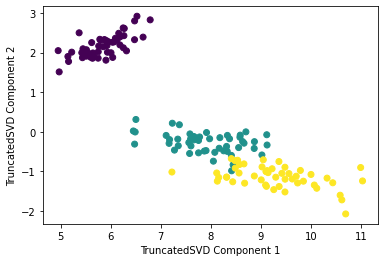

In [27]:
from sklearn.decomposition import TruncatedSVD, PCA
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt
%matplotlib inline

iris = load_iris()
iris_ftrs = iris.data
# 2개의 주요 component로 TruncatedSVD 변환
tsvd = TruncatedSVD(n_components=2)
tsvd.fit(iris_ftrs)
iris_tsvd = tsvd.transform(iris_ftrs)

# 산점도 2차원으로 TruncatedSVD 변환된 데이터 표현. 품종은 색깔로 구분
plt.scatter(x=iris_tsvd[:,0], y= iris_tsvd[:,1], c= iris.target)
plt.xlabel('TruncatedSVD Component 1')
plt.ylabel('TruncatedSVD Component 2')

    TrunscatedSVD 변환 역시 PCA와 유사하게 변환 후에 품종별로 어느 정도 클러스터링이 가능할 정도로 각 변환 속성으로 뛰어난 고유성을 가지고 있음을 알 수 있음

- 붓꽃 데이터를 스케일링으로 변환한 뒤에 TruncatedSVD와 PCA 클래스 변환 비교

Text(0.5, 1.0, 'PCA Transformed')

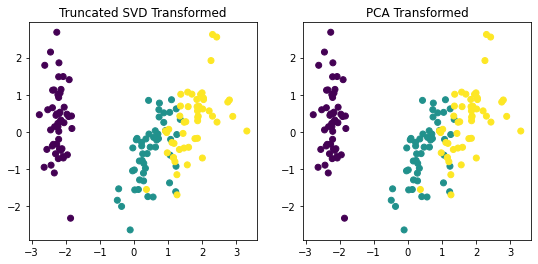

In [28]:
from sklearn.preprocessing import StandardScaler

# iris 데이터를 StandardScaler로 변환
scaler = StandardScaler()
iris_scaled = scaler.fit_transform(iris_ftrs)

# 스케일링된 데이터를 기반으로 TruncatedSVD 변환 수행 
tsvd = TruncatedSVD(n_components=2)
tsvd.fit(iris_scaled)
iris_tsvd = tsvd.transform(iris_scaled)

# 스케일링된 데이터를 기반으로 PCA 변환 수행 
pca = PCA(n_components=2)
pca.fit(iris_scaled)
iris_pca = pca.transform(iris_scaled)

# TruncatedSVD 변환 데이터를 왼쪽에, PCA변환 데이터를 오른쪽에 표현 
fig, (ax1, ax2) = plt.subplots(figsize=(9,4), ncols=2)
ax1.scatter(x=iris_tsvd[:,0], y= iris_tsvd[:,1], c= iris.target)
ax2.scatter(x=iris_pca[:,0], y= iris_pca[:,1], c= iris.target)
ax1.set_title('Truncated SVD Transformed')
ax2.set_title('PCA Transformed')

    두 개가 거의 동일함을 알 수 있음
- 두 개의 변환 행렬 값과 원본 속성별 컴포넌트 비율값을 실제로 비교


In [29]:
print((iris_pca - iris_tsvd).mean())
print((pca.components_ - tsvd.components_).mean())

2.339760329927998e-15
4.85722573273506e-17


    모두 0에 가까운 값이므로 2개의 변환이 서로 동일함을 알 수 있음

- 즉, 데이터셋이 스케일링으로 데이터 중심이 동일해지면, 사이킷런의 SVD와 PCA는 동일한 변환을 수행한다. 이는 PCA가 SVD 알고리즘으로 구현되었음을 의미한다.
- 하지만 PCA는 Dense Matrix에 대한 변환만 가능하며, SVD는 Sparse Matrix에 대한 변환도 가능하다.
- SVD는 PCA와 유사하게, 컴퓨터 비전 영역에서 이미지 압축을 통한 패턴 인식과 신호 처리 분야에 사용된다. 또한 텍스트의 토픽 모델링 기법인 LSA(Latent Semantic Analysis)의 기반 알고리즘이다.

## **05. NMF(Non-Negative Matrix Factorization)**
---

> ### NMF 개요
> ---

- NMF는 Truncated SVD와 같이 낮은 랭크를 통한 행렬 근사(Low-Rank Approximation) 방식의 변형이다.
- NMF는 원본 행렬 내의 모든 원소 값이 모두 양수(0 이상)라는 것이 보장되면, 다음과 같이 좀 더 간단하게 두 개의 기반 양수 행렬로 분해될 수 있는 기법을 지칭한다.

- 행렬 분해를 하게 되면 W 행렬가 H 행렬은 일반적으로 길고 가는 행렬 W(즉, 원본 행렬의 행 크기와 같고 열 크기보다 작은 행렬)와 작고 넓은 행렬 H(원본 행렬의 행 크기보다 작고 열 크기와 같은 행렬)로 분해된다.
    - 이렇게 분해된 행렬은 잠재 요소를 특성으로 가지게 됨.
    - 분해 행렬 W는 원본 행에 대해서 이 잠재 요소의 값이 얼마나 되는지에 대응하며, 분해 행렬 H는 이 잠재 요소가 원본 열(즉, 원본 속성)로 어떻게 구성됐는지를 나타내는 행렬
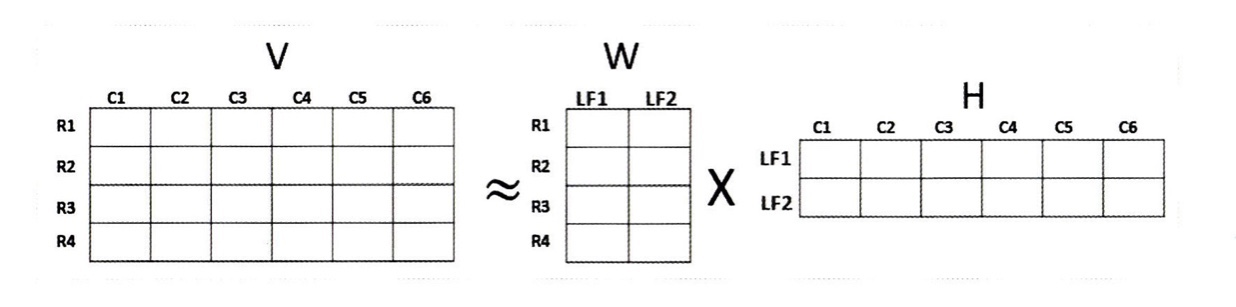

- 붓꽃 데이터를 NMF를 이용해 2개의 컴포넌트로 변환하고 이를 시각화
    - 사이킷런에서 NMF는 NMF 클래슬르 이용해 지원됨

/usr/local/lib/python3.7/dist-packages/sklearn/decomposition/_nmf.py:294: FutureWarning: The 'init' value, when 'init=None' and n_components is less than n_samples and n_features, will be changed from 'nndsvd' to 'nndsvda' in 1.1 (renaming of 0.26).
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/decomposition/_nmf.py:1641: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  ConvergenceWarning,


Text(0, 0.5, 'NMF Component 2')

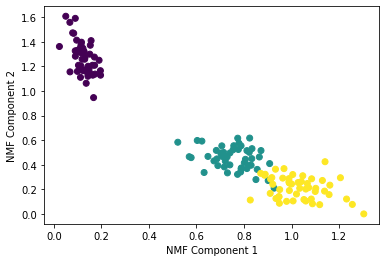

In [30]:
## 붓꽃 데이터를 NMF를 이용해 2개의 컴포넌트로 변환하고 이를 시각화

from sklearn.decomposition import NMF
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt
%matplotlib inline

iris = load_iris()
iris_ftrs = iris.data
nmf = NMF(n_components=2)
nmf.fit(iris_ftrs)
iris_nmf = nmf.transform(iris_ftrs)
plt.scatter(x=iris_nmf[:,0], y= iris_nmf[:,1], c= iris.target)
plt.xlabel('NMF Component 1')
plt.ylabel('NMF Component 2')

- NMF도 SVD와 유사하게 이미지 압축을 통한 패턴 인식, 텍스트의 토픽 모델링 기법, 문서 유사도 및 클러스터링에 잘 사용된다. 또한 영화 추천과 같은 Recommendations 영역에 활발하게 적용된다.